## TEAM MEMBERS :

- Ahmad Mahdy SEC:1, BN:9
- Ahmad Abdelmageed SEC:1, BN:8
- Ahmad Alnoubi SEC:1, BN: 3

[GITHUB](https://github.com/Ahmad-Abdalmageed/Bloch-Equation-Simulation)


# Bloch Equation Simulation 
### An implementation of Bloch equations that describes the behaviour of the bulk magnetization 

Main importations

In [1]:
import bloch as b  # a Class which is implemented in it`s own module 
import numpy as np
from matplotlib.animation import FuncAnimation
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook

##### instantation of the main class responsible for the calculations needed and printing the accopanied doc string 
###### the file can be tracked here [Bloch](bloch.py)

In [2]:
T1 = 900*10**-3
T2 = 50*10**-3
M0 =1.5

In [3]:
m = b.magentization(T1, T2, M0)
print(b.magentization.__doc__)


    Responsible for calculating the magnetization vector.
    Implements the following:
    * calculate the magnetization vector after application of Mo [0 0 Mo]
    * Returns the vector into its relaxation state
    


#### we searched for T1 and T2 values for different tissues and found many results 
##### the values we tried are from this link https://mri-q.com/why-is-t1--t2.html
![T1T2](https://mri-q.com/uploads/3/4/5/7/34572113/5092979_orig.gif)

#### applied an RF pulse for 1 sec 

In [4]:
m.rotate(1)
print(m.rotate.__doc__)


        Rotates the magnetization vector by application of an RF pulse for a given time t
        ================== =================================================
        **Parameters**
        t                  Time in seconds
        ================== =================================================
        


## plotting 

### The following chunck of code is repsonsible for making an annimation of the bulk magnetization\`s trajectory 
- using matplotlin funcanimation and quiver for 3d plotting 
- the plot is initialized with the first values returned from the rotations of the vector 
- an update function is given for FuncAnimation which updates the plot\`s data with the next value to show in the next frame 

In [5]:
m.vector.shape

(101, 3)

<IPython.core.display.Javascript object>


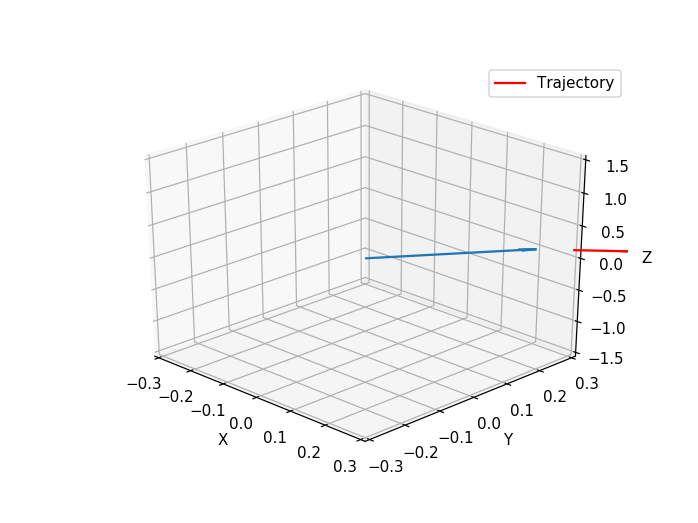

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Origin
x, y, z = (0, 0, 0)

# Initizalizing plot
# Directions of the vector 
u = m.vector[0, 0]  # x Component 
v = m.vector[0, 1]  # y Component
w = m.vector[0, 2]   # z Component 

quiver = ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.1, color="red")
ax.plot(m.vector[:0, 0], m.vector[:0, 1], m.vector[:0, 2], color='r', label="Trajectory")

def update(t):
    global quiver
    u = m.vector[t, 0]
    v = m.vector[t, 1]
    w = m.vector[t, 2]
    quiver.remove()
    quiver= ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.1)
    ax.plot(m.vector[:t, 0], m.vector[:t, 1], m.vector[:t, 2], color='r', label="Trajectory")
    
ax.set_xlim3d([-0.3, 0.3])
ax.set_xlabel('X')

ax.set_ylim3d([-0.3, 0.3])
ax.set_ylabel('Y')

ax.set_zlim3d([-1.5, 1.5])
ax.set_zlabel('Z')

ax.view_init(elev= 28, azim=-45)
ani = FuncAnimation(fig, update, frames=np.arange(0, 100), interval=200, blit= True)
ax.legend()
# ani.save("magnetization.gif")
plt.show()

##### Note : the animation is interactive on Jupyter

### Third Part 
#### Applying fourier Transform on an image 

###### importing a class made for the image's loading and performing fourier tranfsorm 

In [7]:
import image  # a class for image`s processes 

In [8]:
imageSlice = image.image()
print(image.image().__doc__)


    Responsible for all interactions with images.
    Implements the following:
    * Loading the image data to the class
    * Apply Fourier Transformation to the image
    * Extract the following components from the transformations :
        - Real Component
        - Imaginary Component
        - Phase
        - Magnitude
    


In [11]:
imageSlice.loadImage("images/leg.jpg", greyScale=True)
print(imageSlice.loadImage.__doc__)

the image loaded shape is  (512, 512)

        Implements the following:
        * Loading the image from specified path
        * Normalize the image values
        ================== =============================================================================
        **Parameters**
        Path               a string specifying the absolute path to image, if provided loads this image
                           to the class`s data
        data               numpy array if provided loads this data directly
        fourier            numpy array if provided loads the transformed data
        imageShape         a tuple of ints identifying the image shape if any method is used except using
                           path
        greyScale          if True the image is transformed to greyscale via OpenCV`s convert image tool
        ================== =============================================================================
        


##### Showing the image loaded 

## UPDATE 
##### plotted a new image and visualized the K-space components

In [12]:
import matplotlib.cm as cm

<IPython.core.display.Javascript object>


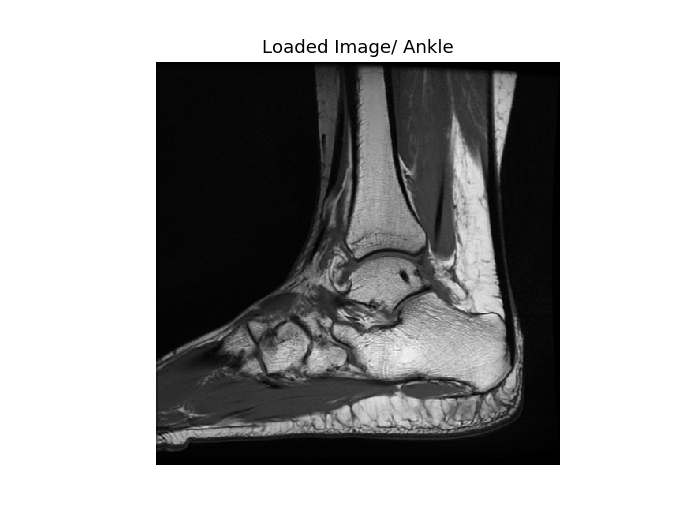

In [13]:
fig2 = plt.figure()
plt.title("Loaded Image/ Ankle")
plt.axis("off")
plt.imshow(imageSlice.imageData, cmap=cm.gray)

<IPython.core.display.Javascript object>


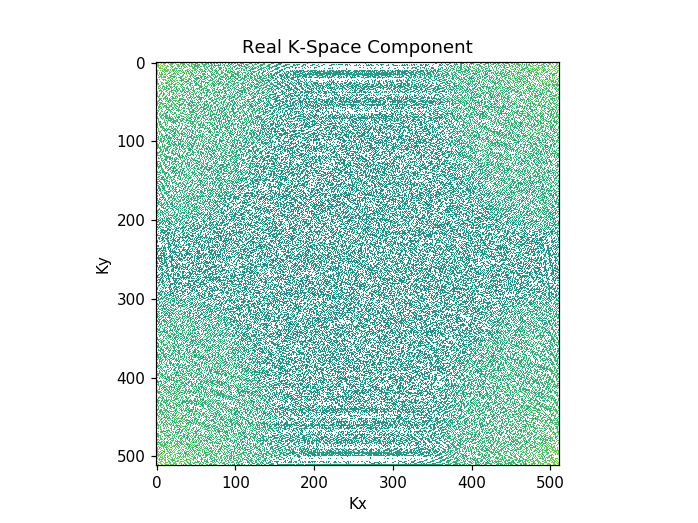

/home/ahmad/PycharmProjects/Bloch-Equation-Simulation/image.py:110: RuntimeWarning: invalid value encountered in log
  if logScale : return 20*np.log(np.real(self.imageFourier)+ self.__epsilon)


In [14]:
imageSlice.fourierTransform()
fig3 = plt.figure()
plt.title("Real K-Space Component")
plt.ylabel("Ky")
plt.xlabel("Kx")
plt.imshow(imageSlice.realComponent(logScale=True))

<IPython.core.display.Javascript object>


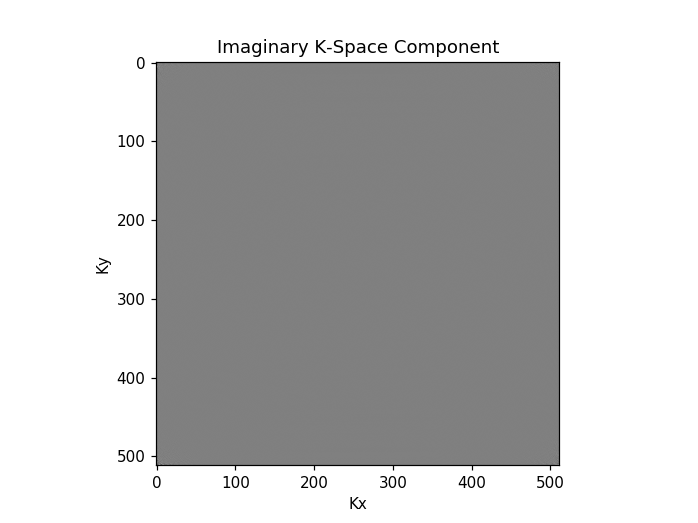

In [16]:
fig4 = plt.figure()
plt.title("Imaginary K-Space Component")
plt.ylabel("Ky")
plt.xlabel("Kx")
plt.imshow(imageSlice.imaginaryComponent(), cmap=cm.gray)

In [ ]:
print("Function`s description")
print("imageSlice.fourierTransform: ")
print(imageSlice.fourierTransform.__doc__)
print("imageSlice.magnitude:")
print(imageSlice.magnitude.__doc__)
print("imageSlice.phase: ")
print(imageSlice.phase.__doc__)

### Fourth Part 
#### Visualizing the Field\`s in-uniformity   

In [17]:
field = 3.0  # Tesla 
delta = 0.5

In [18]:
np.random.seed(123)
Bz = np.random.uniform(field-delta, field+delta, size=10)

<IPython.core.display.Javascript object>


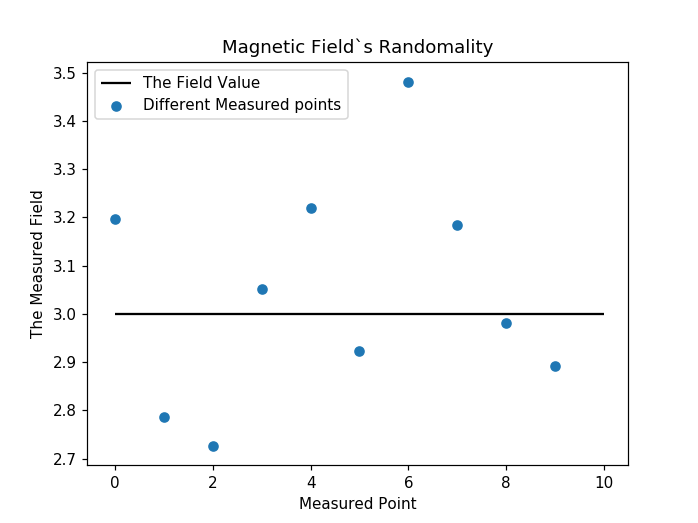

In [19]:
fig5 = plt.figure()
plt.title("Magnetic Field`s Randomality")
plt.xlabel("Measured Point")
plt.ylabel("The Measured Field")
plt.hlines(3,0, 10, label="The Field Value")
plt.scatter(range(0, 10), Bz, label="Different Measured points")
plt.legend()

# Second Assignment

## Visualizing the differences in Angular Frequencies 

In [22]:
G = 42.6  # for water molecules MHZ/T
omega = G* Bz

<IPython.core.display.Javascript object>


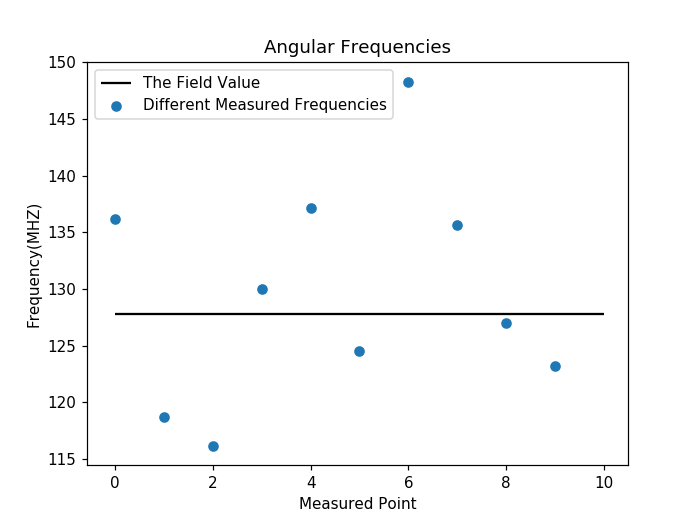

In [23]:
fig6 = plt.figure()
plt.title("Angular Frequencies")
plt.xlabel("Measured Point")
plt.ylabel("Frequency(MHZ)")
plt.hlines(3*G,0, 10, label="The Field Value")
plt.scatter(range(0, 10), omega, label="Different Measured Frequencies")
plt.legend()
plt.show()

## Ploting a Bulk Magnetization visualization after adding nonuniformity

In [24]:
m2 = b.magentization(T1, T2, Bz[:5])

In [25]:
m2.rotate(1)

<IPython.core.display.Javascript object>


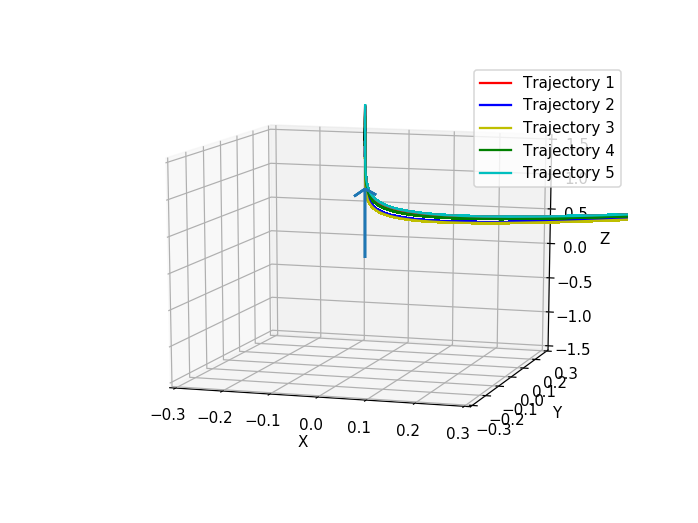

In [27]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Origin
x = np.zeros(5)
y = np.zeros(5)
z = np.zeros(5)

colors = ['r', 'b', 'y', 'g', 'c']

# Initizalizing plot
# Directions of the vector m2
u = m2.vector[0, 0]  # x Component 
v = m2.vector[0, 1]  # y Component
w = m2.vector[0, 2]   # z Component 

quiver = ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.1, color="red")

for point in range(5):
    ax.plot(m2.vector[:0, 0, point], m2.vector[:0, 1, point], m2.vector[:0, 2, point], color=colors[point], label="Trajectory %s"%(point+1))

def update(t):
    global quiver
    u = m.vector[t, 0]
    v = m.vector[t, 1]
    w = m.vector[t, 2]
    quiver.remove()
    quiver= ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.1)
    for point in range(5):
        ax.plot(m2.vector[:t, 0, point], m2.vector[:t, 1, point], m2.vector[:t, 2, point],
                color=colors[point], label="Trajectory %s"%(point+1))
    
ax.set_xlim3d([-0.3, 0.3])
ax.set_xlabel('X')

ax.set_ylim3d([-0.3, 0.3])
ax.set_ylabel('Y')

ax.set_zlim3d([-1.5, 1.5])
ax.set_zlabel('Z')

ax.view_init(elev= 28, azim=-45)
ani = FuncAnimation(fig, update, frames=np.arange(0, 100), interval=200, blit= True)
ax.legend()
# ani.save("magnetization2.gif")
plt.show()

### Different colors are used for different trajectories, visualizing different trajectories for 5 different points 